In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 

# Load the Titanic dataset
file_folder = ('train.csv')
titanic_df = pd.read_csv(file_folder)

In [ ]:
# Drop rows with any missing values in these key columns.
plot_data = titanic_df.dropna(subset=['Age', 'Fare', 'Pclass', 'Survived'])

In [5]:
# Define colors for survival status (0: Perished, 1: Survived)
colors = {0: 'tomato', 1: 'forestgreen'}
survival_colors = plot_data['Survived'].map(colors)


In [ ]:
# Let's see the first few rows of our prepared data

print("--- Prepared Data for 3D Plot ---")
print(plot_data[['Age', 'Fare', 'Pclass', 'Survived']].head())

--- Prepared Data for 3D Plot ---
    Age     Fare  Pclass  Survived
0  22.0   7.2500       3         0
1  38.0  71.2833       1         1
2  26.0   7.9250       3         1
3  35.0  53.1000       1         1
4  35.0   8.0500       3         0


In [ ]:
# Set up a clean plot style
plt.style.use('seaborn-v0_8-whitegrid')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8656\2515365253.py:38: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


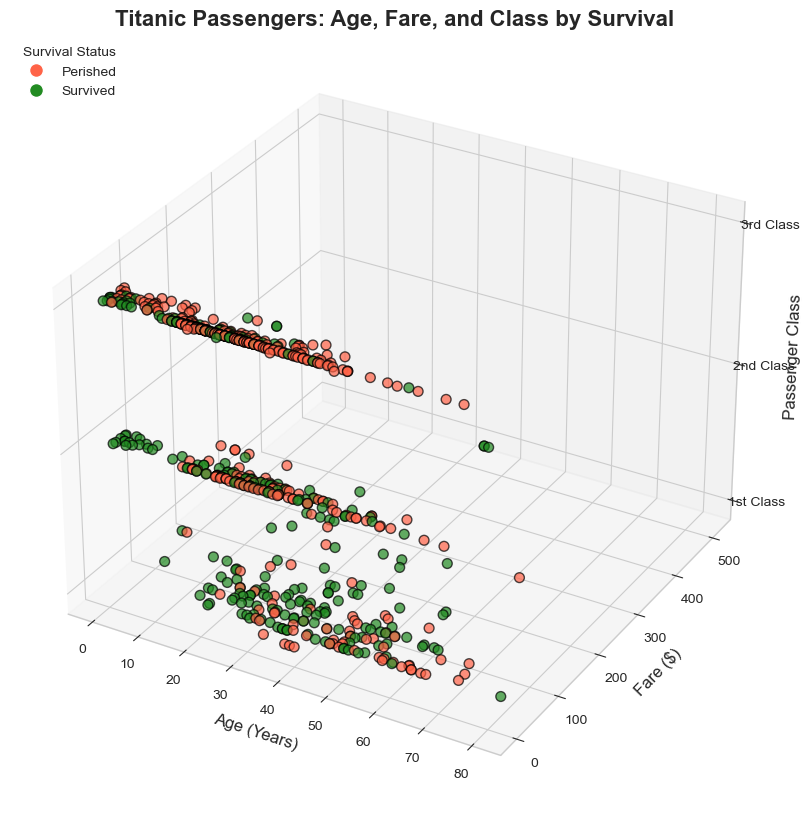

In [ ]:
# Create a figure and a 3D axes object
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d') 

#Plot the 3D scatter points

scatter = ax.scatter(plot_data['Age'], plot_data['Fare'], plot_data['Pclass'],
                     c=survival_colors,
                     s=50, #Size of the points
                     alpha=0.7, # Transparency
                     edgecolors='k', # Black edge for visibility
                     label=plot_data['Survived'].\
                           map({0: 'Perished', 1: 'Survived'}) # For legend
                    )

# Set labels for each axis
ax.set_xlabel('Age (Years)', fontsize=12)
ax.set_ylabel('Fare ($)', fontsize=12)
ax.set_zlabel('Passenger Class', fontsize=12)

# Set a descriptive title
ax.set_title('Titanic Passengers: Age, Fare, and Class by Survival',
              fontsize=16, fontweight='bold')

#Customize z-axis ticks to show Pclass labels clearly
ax.set_zticks([1, 2, 3])
ax.set_zticklabels(['1st Class', '2nd Class', '3rd Class'])

# Create a custom legend for survival status

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Perished',
               markerfacecolor='tomato', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Survived',
               markerfacecolor='forestgreen', markersize=10)
]
ax.legend(handles=legend_elements, title='Survival Status', loc='upper left')
plt.tight_layout()
plt.show()
